## Modelling

Model decision_tree

In [3]:
# import libraries
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import matplotlib.pyplot as plt

## Assess data

In [4]:
df = pd.read_csv('data/preprocessed_df.csv')

In [5]:
# Define independent (X) and dependent variables (y)
X = df.drop(['classificatie', 'aankomststationVerkorting', 'vertrekstationVerkorting', 'slice dt iso', 'vertrekmoment_utc', 'verkeersdatum_ams'], axis=1)
y = df['classificatie']

## Build model

In [6]:
# Random undersampling
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

In [7]:
# Make train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [25]:
# Make pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dtc', DecisionTreeClassifier(random_state=42))
])

In [9]:
# fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dtc', DecisionTreeClassifier(random_state=42))])

In [10]:
# Predict on test
y_pred = pipeline.predict(X_test)

## Metrics

Accuracy of the model: 0.676923076923077


<Axes: >

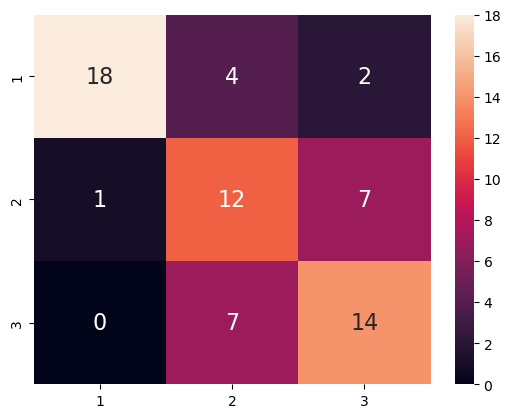

In [11]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', accuracy)

# calculate confusion matrix
true_labels = [1, 2, 3]
confusion_matrix_array = confusion_matrix(y_test, y_pred)
confusion_matrix_dataframe = pd.DataFrame(confusion_matrix_array, range(3), range(3))
sn.heatmap(confusion_matrix_dataframe, annot=True, annot_kws={"size": 16}, xticklabels=true_labels, yticklabels=true_labels)

## Visualize

In [12]:
dtc_model = pipeline.named_steps['dtc']

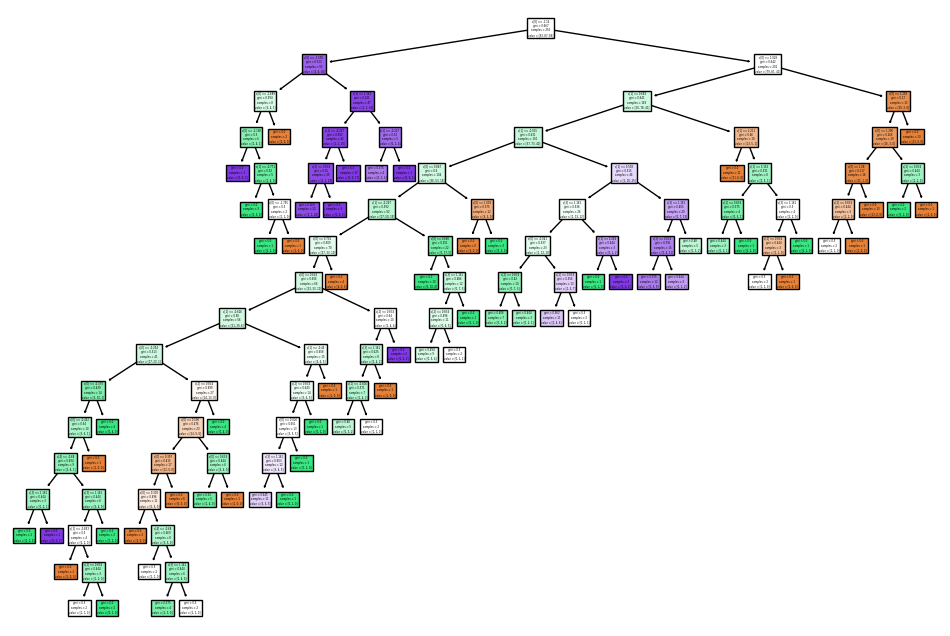

In [13]:
plt.figure(figsize=(12, 8))
plot_tree(dtc_model, filled=True)
plt.show()

## Hyperparameter tuning

### Grid search

In [32]:
# Define the params
param_grid = {
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__max_depth': [5, 10, 15],
    'dtc__min_samples_split': [2, 5, 10],
}

In [33]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dtc',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dtc__criterion': ['gini', 'entropy'],
                         'dtc__max_depth': [5, 10, 15],
                         'dtc__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Best Parameters: {'dtc__criterion': 'gini', 'dtc__max_depth': 15, 'dtc__min_samples_split': 2}
Best Accuracy: 0.703318250377074


<Axes: >

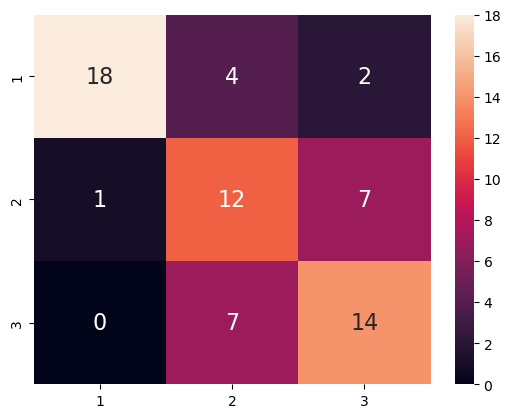

In [36]:
# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
true_labels = [1, 2, 3]
confusion_matrix_array = confusion_matrix(y_test, y_pred)
confusion_matrix_dataframe = pd.DataFrame(confusion_matrix_array, range(3), range(3))
sn.heatmap(confusion_matrix_dataframe, annot=True, annot_kws={"size": 16}, xticklabels=true_labels, yticklabels=true_labels)